**This is my very first kernel ever,so any feedback of yours will be appreciated.**

The reason I chose this **A Song of Ice and Fire** dataset as my first step is  I am actually a big fan of the TV serial GoT, and I am so into the ASoIaF world.

**
If you have any question,please leave a message below and I will check it.**

This kernel is composed of 2 parts: 

**1. Character Death Prediction**       **2.Battle Analysis**

If you are looking for the Battle Analysis,you can skip the former part.

Let's start the prediction now.

**1. Character Death Prediction**

**Some necessary libs & Read file**

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from pandas import Series,DataFrame
import matplotlib.pyplot as plt

data = pd.read_csv("character-predictions.csv")

Data cleansing

This part is from https://www.kaggle.com/shaildeliwala/exploratory-analysis-and-predictions
by Shail Deliwala.

**1)  Culture Induction**: Integrate similar culture into one single value.

**2) Drop**: Drop data worthless for prediction like "name","dataOfBirth".

**3) Factorization**: Transform discrete data like "title","mother","culture" into numerical data.

**4) Fill NaN**:Fill null value with -1.

In [4]:
#--------------------- Data Cleansing -----------------------------------------

#-------- culture induction -------
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
}

def get_cult(value):
    value = value.lower()
    v = [k for (k, v) in cult.items() if value in v]
    return v[0] if len(v) > 0 else value.title()

data.loc[:, "culture"] = [get_cult(x) for x in data.culture.fillna("")]

#-------- culture induction -------

data.drop(["name", "alive", "pred", "plod", "isAlive", "dateOfBirth", "DateoFdeath"], 1, inplace = True)

data.loc[:, "title"] = pd.factorize(data.title)[0]
data.loc[:, "culture"] = pd.factorize(data.culture)[0]
data.loc[:, "mother"] = pd.factorize(data.mother)[0]
data.loc[:, "father"] = pd.factorize(data.father)[0]
data.loc[:, "heir"] = pd.factorize(data.heir)[0]
data.loc[:, "house"] = pd.factorize(data.house)[0]
data.loc[:, "spouse"] = pd.factorize(data.spouse)[0]

data.fillna(value = -1, inplace = True)
''' $$ The code below usually works as a sample equilibrium. However in this case,
 this equilibirium actually decrease our accuracy, all because the original 
prediction data was released without any sample balancing. $$

data = data[data.actual == 0].sample(350, random_state = 62).append(data[data.actual == 1].sample(350, random_state = 62)).copy(deep = True).astype(np.float64)

'''
Y = data.actual.values

Odata = data.copy(deep=True)

data.drop(["actual"], 1, inplace = True)

**Feature Correlation**

See the correlation of features on heatmap


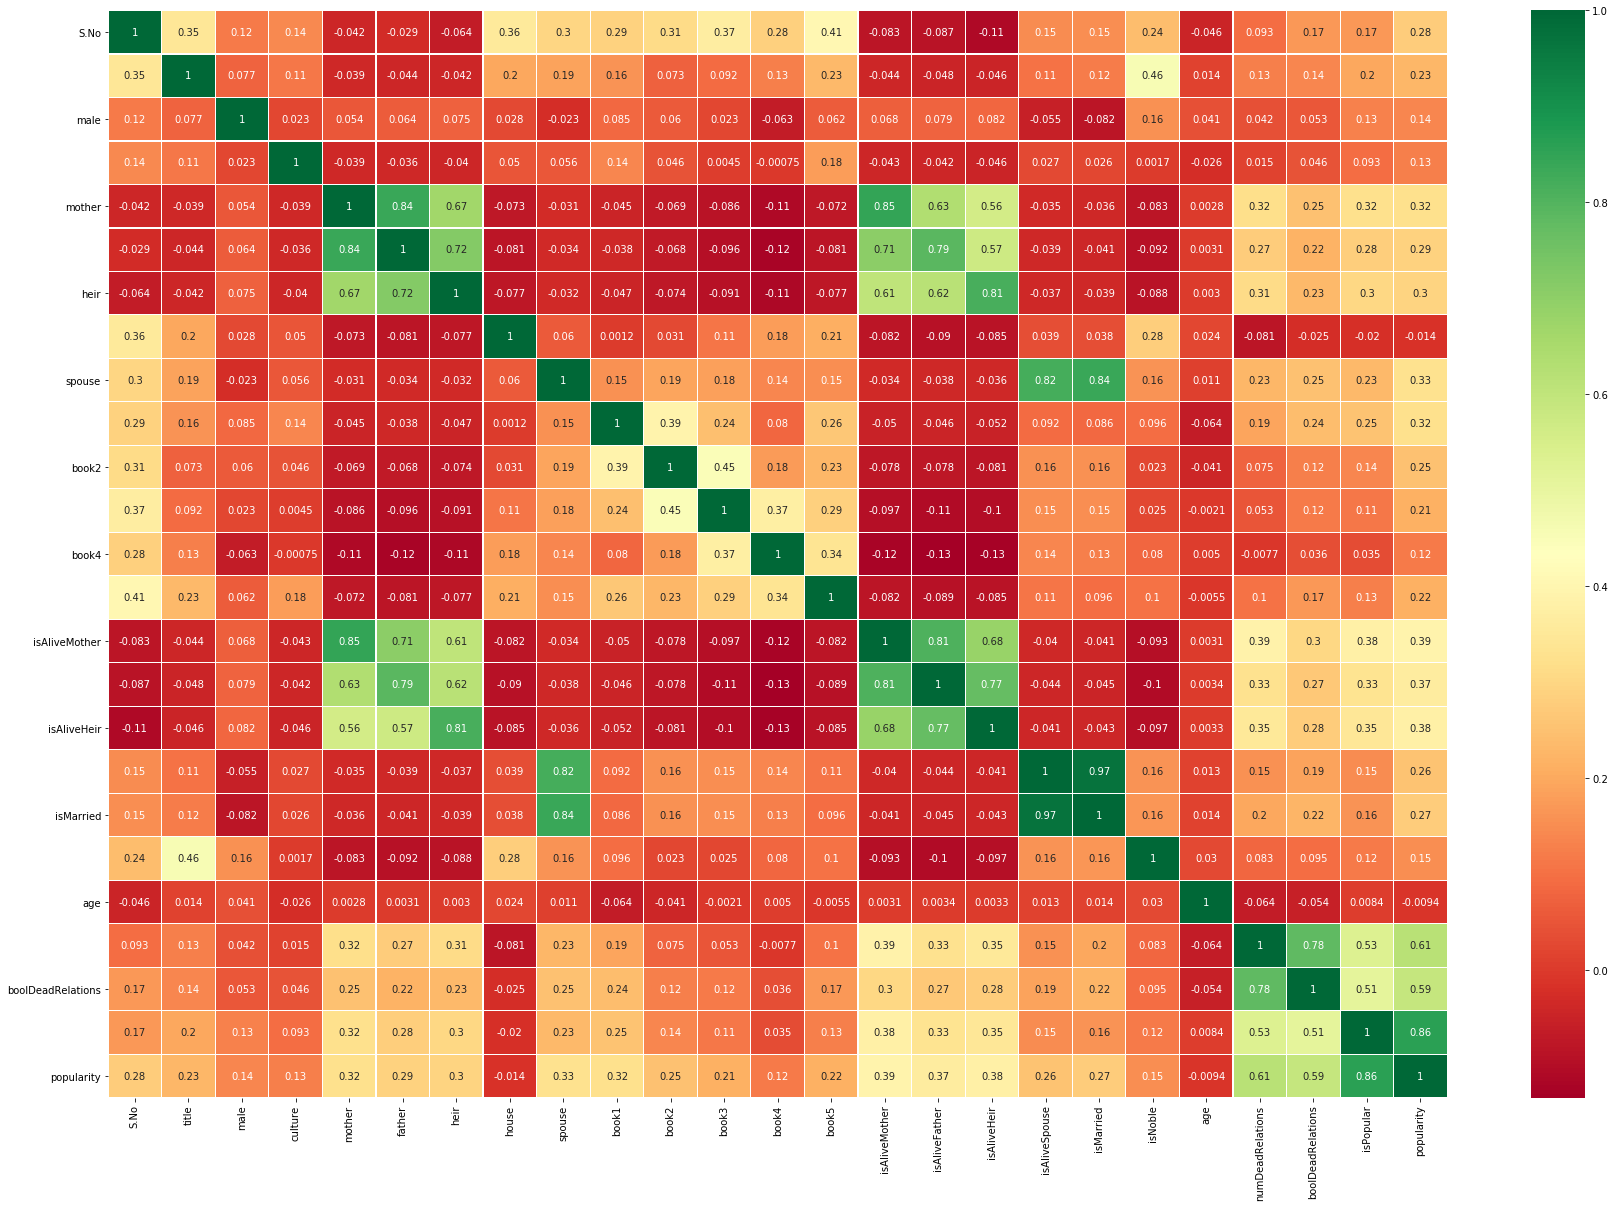

In [5]:
#------------------ Feature Correlation ---------------------------------------

sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(30,20)
plt.show()

**Predicting**

Predicting the death of characters by creating 10 different models of Machine Learning

**1.RandomForest**







In [6]:
#------------------ Predicting ------------------------------------------------

#---------- 1 RandomForest -----------------
data.drop(["S.No"], 1, inplace = True)
''' ATTENTION: This rf algorithm achieves 99%+ accuracy, this is because the \
original predictor-- the document releaser use exactly the same algorithm to predict!
    '''
from sklearn.ensemble import RandomForestClassifier


random_forest = RandomForestClassifier(n_estimators=100)

random_forest.fit(data, Y)

print('RandomForest Accuracy：(original)\n',random_forest.score(data, Y))


RandomForest Accuracy：(original)
 0.9922918807810894


**2.DecisionTree**


In [7]:
#---------- 2 DecisionTree -----------------

from sklearn.tree import DecisionTreeClassifier

DT=DecisionTreeClassifier()

DT.fit(data,Y)

print('DecisionTree Accuracy：(original)\n',DT.score(data, Y))


DecisionTree Accuracy：(original)
 0.9922918807810894


**3.SVC**



In [8]:
#---------- 3 SVC -----------------

from sklearn.svm import SVC, LinearSVC
svc = SVC()

svc.fit(data, Y)

print('SVC Accuracy：\n',svc.score(data, Y))


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC Accuracy：
 0.8776978417266187


**4.LogisticRegression**



In [9]:
#---------- 4 LogisticRegression -----------------

from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()

LR.fit(data, Y)

print('LogisticRegression Accuracy：\n',LR.score(data, Y))

LogisticRegression Accuracy：
 0.7754367934224049


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


**5.kNN**



In [10]:
#---------- 5 kNN -----------------

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3)

knn.fit(data, Y)

print('kNN Accuracy：\n',knn.score(data, Y))

kNN Accuracy：
 0.8525179856115108


**6.NaiveBayes Gaussian**



In [11]:
#---------- 6 NaiveBayes Gaussian -----------------

from sklearn.naive_bayes import GaussianNB

gaussian = GaussianNB()

gaussian.fit(data, Y)

print('gaussian Accuracy：\n',gaussian.score(data, Y))

gaussian Accuracy：
 0.7702980472764646


**7.LogisticRegression with Cross Validation**



In [12]:
#---------- 7 LogisticRegression with Cross Validation-----------------
from sklearn.linear_model import LogisticRegression
# from sklearn import cross_validation
from sklearn.cross_validation import train_test_split
predictors=['title', 'culture', 'mother', 'father', 'heir', 'house', 'spouse', 'male', 'book1', 'book2', 'book3', 'book4', 'book5', 'isAliveFather', 'isAliveMother', 'isAliveHeir', 'isAliveSpouse', 'isMarried', 'isNoble', 'age', 'numDeadRelations', 'boolDeadRelations', 'isPopular', 'popularity']
alg=LogisticRegression(random_state=1)
scores=cross_validation.cross_val_score(alg,Odata[predictors],Odata["actual"],cv=3)
print('Logistic CrossValidation Accuracy：\n',scores.mean())

ModuleNotFoundError: No module named 'sklearn.cross_validation'

**8.LinearRegression with KFold**



In [13]:
#---------- 8 LinearRegression-----------------

from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import KFold
predictors=['title', 'culture', 'mother', 'father', 'heir', 'house', 'spouse', 'male', 'book1', 'book2', 'book3', 'book4', 'book5', 'isAliveFather', 'isAliveMother', 'isAliveHeir', 'isAliveSpouse', 'isMarried', 'isNoble', 'age', 'numDeadRelations', 'boolDeadRelations', 'isPopular', 'popularity']
alg=LinearRegression()
kf=KFold(Odata.shape[0],n_folds=3,random_state=1)
predictions=[]
for train,test in kf:
    train_predictors=(Odata[predictors].iloc[train,:])
    train_target=Odata["actual"].iloc[train]
    alg.fit(train_predictors,train_target)
    test_predictions=alg.predict(Odata[predictors].iloc[test,:])
    predictions.append(test_predictions)
    
predictions=np.concatenate(predictions,axis=0)
predictions[predictions>.5]=1
predictions[predictions<=.5]=0
accuracy=sum(predictions==Odata["actual"])/len(predictions)
print('LinearRegression Accuracy：\n',accuracy)

ModuleNotFoundError: No module named 'sklearn.cross_validation'

**9.RandomForest with CrossValidation**



In [14]:
#---------- 9 RandomForest with CrossValidation -----------------

from sklearn import cross_validation
from sklearn.ensemble import RandomForestClassifier
predictors=['title', 'culture', 'mother', 'father', 'heir', 'house', 'spouse', 'male', 'book1', 'book2', 'book3', 'book4', 'book5', 'isAliveFather', 'isAliveMother', 'isAliveHeir', 'isAliveSpouse', 'isMarried', 'isNoble', 'age', 'numDeadRelations', 'boolDeadRelations', 'isPopular', 'popularity']
alg=RandomForestClassifier(random_state=1,n_estimators=150,min_samples_split=12,min_samples_leaf=1)
kf=cross_validation.KFold(Odata.shape[0],n_folds=3,random_state=1)
scores=cross_validation.cross_val_score(alg,Odata[predictors],Odata["actual"],cv=kf)
print('RandomForest Accuracy：\n',scores.mean())

ImportError: cannot import name 'cross_validation' from 'sklearn' (/anaconda3/lib/python3.7/site-packages/sklearn/__init__.py)

**10.GradientBoosting**



In [15]:
#---------- 10 GradientBoosting -----------------

from sklearn.cross_validation import KFold
from sklearn.ensemble import GradientBoostingClassifier

algorithms=[
        [GradientBoostingClassifier(random_state=1,n_estimators=25,max_depth=3),['title', 'culture', 'mother', 'father', 'heir', 'house', 'spouse', 'male', 'book1', 'book2', 'book3', 'book4', 'book5', 'isAliveFather', 'isAliveMother', 'isAliveHeir', 'isAliveSpouse', 'isMarried', 'isNoble', 'age', 'numDeadRelations', 'boolDeadRelations', 'isPopular', 'popularity']],
        [LogisticRegression(random_state=1),['title', 'culture', 'mother', 'father', 'heir', 'house', 'spouse', 'male', 'book1', 'book2', 'book3', 'book4', 'book5', 'isAliveFather', 'isAliveMother', 'isAliveHeir', 'isAliveSpouse', 'isMarried', 'isNoble', 'age', 'numDeadRelations', 'boolDeadRelations', 'isPopular', 'popularity']]]
 
 
kf=KFold(Odata.shape[0],n_folds=3,random_state=1)
predictions=[]
for train,test in kf:
    train_target=Odata["actual"].iloc[train]
    full_test_predictions=[]
    for alg,predictors in algorithms:
        alg.fit(Odata[predictors].iloc[train,:],train_target)
        test_predictions=alg.predict_proba(Odata[predictors].iloc[test,:].astype(float))[:,1]
        full_test_predictions.append(test_predictions)
    test_predictions=(full_test_predictions[0]+full_test_predictions[1])/2
    test_predictions[test_predictions<=.5]=0
    test_predictions[test_predictions>.5]=1
    predictions.append(test_predictions)

predictions=np.concatenate(predictions,axis=0)
accuracy=sum(predictions==Odata["actual"])/len(predictions)
print('GradientBoosting Accuracy: \n',accuracy)

ModuleNotFoundError: No module named 'sklearn.cross_validation'

Here is a try of **softmax** unit on** tensorflow**.
I am not familar with tf, so this is only an attempt.



In [16]:
#---------- 11 TensorflowSoftmax -----------------


import tensorflow as tf

dataset_X = data[['title', 'culture', 'mother', 'father', 'heir', 'house', 'spouse', 'male', 'book1', 'book2', 'book3', 'book4', 'book5', 'isAliveFather', 'isAliveMother', 'isAliveHeir', 'isAliveSpouse', 'isMarried', 'isNoble', 'age', 'numDeadRelations', 'boolDeadRelations', 'isPopular', 'popularity']].as_matrix()

dataset_Y = Odata[['actual']].as_matrix()


X = tf.placeholder(tf.float32, shape=[None, 24])
y = tf.placeholder(tf.float32, shape=[None, 1])
 
weights = tf.Variable(tf.random_normal([24, 2]), name='weights')
bias = tf.Variable(tf.zeros([2]), name='bias')
y_pred = tf.nn.softmax(tf.matmul(X, weights) + bias)
 
cross_entropy = - tf.reduce_sum(y * tf.log(y_pred + 1e-10), reduction_indices=1)

cost = tf.reduce_mean(cross_entropy)
 

train_op = tf.train.GradientDescentOptimizer(0.001).minimize(cost)
 
 
with tf.Session() as sess:
    tf.global_variables_initializer().run()
 
    for epoch in range(50):
        total_loss = 0.
        for i in range(len(dataset_X)):
            # prepare feed data and run
            feed_dict = {X: [dataset_X[i]], y: [dataset_Y[i]]}
            _, loss = sess.run([train_op, cost], feed_dict=feed_dict)
            total_loss += loss
        # display loss per epoch
        print('Epoch: %04d, total loss=%.9f' % (epoch + 1, total_loss))
    print("Train Complete")


ModuleNotFoundError: No module named 'tensorflow'

Now we have tried 10 different ML algorithms and 1 network unit.

Let us do some **bagging** and **boosting**!

**Bagged KNN**



In [17]:
# Bagging
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
# Bagged KNN

from sklearn.ensemble import BaggingClassifier
model=BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3),random_state=0,n_estimators=700)
model.fit(data,Y)
result=cross_val_score(model,data,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged KNN is:',result.mean())

The cross validated score for bagged KNN is: 0.7033374333079783


**Bagged Decision Tree**



In [18]:
# Bagged Decision Tree

model=BaggingClassifier(base_estimator=DecisionTreeClassifier(),random_state=0,n_estimators=100)
model.fit(data,Y)
result=cross_val_score(model,data,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged Decision Tree is:',result.mean())


The cross validated score for bagged Decision Tree is: 0.7974877944833763


**AdaBoost**



In [19]:
#------------------------ Boosting --------------------------------------------

from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.1)
result=cross_val_score(ada,data,Y,cv=10,scoring='accuracy')
print('The cross validated score for AdaBoost is:',result.mean())

The cross validated score for AdaBoost is: 0.7619920212335528


**GradientBoost**



In [20]:
from sklearn.ensemble import GradientBoostingClassifier
grad=GradientBoostingClassifier(n_estimators=500,random_state=0,learning_rate=0.1)
result=cross_val_score(grad,data,Y,cv=10,scoring='accuracy')
print('The cross validated score for Gradient Boosting is:',result.mean())

The cross validated score for Gradient Boosting is: 0.7428643717598062


**XGBoost**

The cross validated score for XGBoost is: 0.7449342115910598

In [21]:
import xgboost as xg
xgboost=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
result=cross_val_score(xgboost,data,Y,cv=10,scoring='accuracy')
print('The cross validated score for XGBoost is:',result.mean())

ModuleNotFoundError: No module named 'xgboost'

**Feature Importance in different alg**

Let us see importance of different features in RF and Boosts


From all four fig we can see the consistency of them. 

Although the importance order are not exactly the same,**"popularity"** and** "house" **matters the most which is not a surprise to us. From the point of literary creating, main characters are put much more attention to than others. So it's easy to figure out what author--George.R.R.Martin are trying to express on the main characters he created.**"House" **is very importance to differ fate of people without doubt,people's fate are naturally bond with the rise or fall of a great house.

**"Title","age" ,"culture"**and**"book5" **also matters. It's believed noble,elder and appear later in chapters are more likely to survive,you can find related research in hottest kernels if you want.

In [ ]:
f,ax=plt.subplots(2,2,figsize=(15,12))
model=RandomForestClassifier(n_estimators=500,random_state=0)
model.fit(data,Y)
pd.Series(model.feature_importances_,data.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,0])
ax[0,0].set_title('Feature Importance in Random Forests')
model=AdaBoostClassifier(n_estimators=200,learning_rate=0.05,random_state=0)
model.fit(data,Y)
pd.Series(model.feature_importances_,data.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,1],color='#ddff11')
ax[0,1].set_title('Feature Importance in AdaBoost')
model=GradientBoostingClassifier(n_estimators=500,learning_rate=0.1,random_state=0)
model.fit(data,Y)
pd.Series(model.feature_importances_,data.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,0],cmap='RdYlGn_r')
ax[1,0].set_title('Feature Importance in Gradient Boosting')
model=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
model.fit(data,Y)
pd.Series(model.feature_importances_,data.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,1],color='#FD0F00')
ax[1,1].set_title('Feature Importance in XgBoost')
plt.show()


Now we have go through the complete predicting

Coming next is the **battle analysis**.




---------------------------------------------------------- **Battle Analysis** ------------------------------------------------------------




**Some necessary lib & Read file**

In [3]:
#-------------------------------- Battle Analysis -------------------------------------------------
#----------------------------- Data Cleansing------------------------------------

import numpy as np
import pandas as pd
import seaborn as sns
from pandas import Series,DataFrame
import matplotlib.pyplot as plt

data = pd.read_csv("battles.csv")

**Fill NaN**

One battle lose many values,try to fill it with field knowledge : )

A few battles are fight with no king or in nowhere, fill it up.

In [4]:
data.iat[37,13]='win'
data.loc[data["name"]=="Siege of Winterfell","battle_type"]='siege'
data.loc[data["name"]=="Siege of Winterfell","major_death"]=0
data.loc[data["name"]=="Siege of Winterfell","major_capture"]=0
#----------------------------------------#
data['attacker_king'] = data['attacker_king'].fillna('Without a king')   
data['defender_king'] = data['defender_king'].fillna('Without a king')
  
data['defender_1'] = data['defender_1'].fillna('common people')

data['attacker_commander'] = data['attacker_commander'].fillna('Without a commander')   
data['defender_commander'] = data['defender_commander'].fillna('Without a commander')
  
data['location'] = data['location'].fillna('Dont know where')


**Add Feature **

Compute battle size for statistics.

In [5]:
#----- Only if we have to full the size of battle
#attacker_size_mid = data['attacker_size'].median()  
#defender_size_mid = data['defender_size'].median()
for i in range(1,len(data)):
    if  np.isnan(data.iloc[i,17]) and np.isnan(data.iloc[i,18]):
        continue
    elif np.isnan(data.iloc[i,17]):
        data.iat[i,17] = data.iat[i,18]
    elif np.isnan(data.iloc[i,18]):
        data.iat[i,18] = data.iat[i,17]
        
data['battle_size'] = data['attacker_size'] + data['defender_size']


**Data Analysis**

In [6]:
#-------------------------------Data Analysis----------------------------------

import matplotlib.pyplot as plt
import seaborn as sns


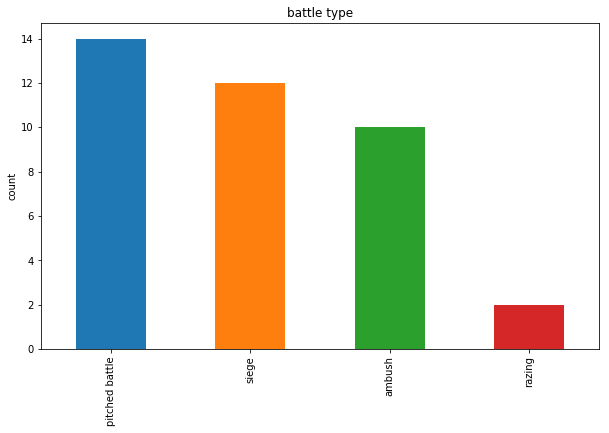

In [7]:
# 1 battle type-----------------
plt.figure(figsize=[10,6])
data.battle_type.value_counts().plot(kind='bar')
plt.title("battle type") 
plt.ylabel("count") 
plt.show()

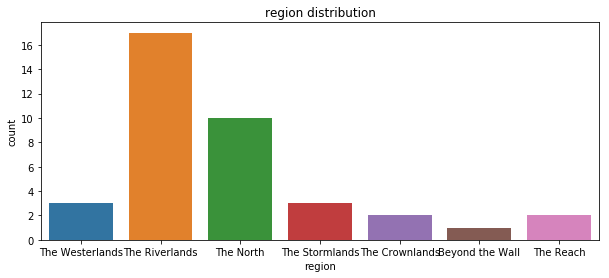

In [8]:
# 2 battle region---------------

fig, axis1 = plt.subplots(1,1,figsize=(10,4))
axis1.set_title("region distribution")
sns.countplot(x='region', data=data, ax=axis1)
plt.show()

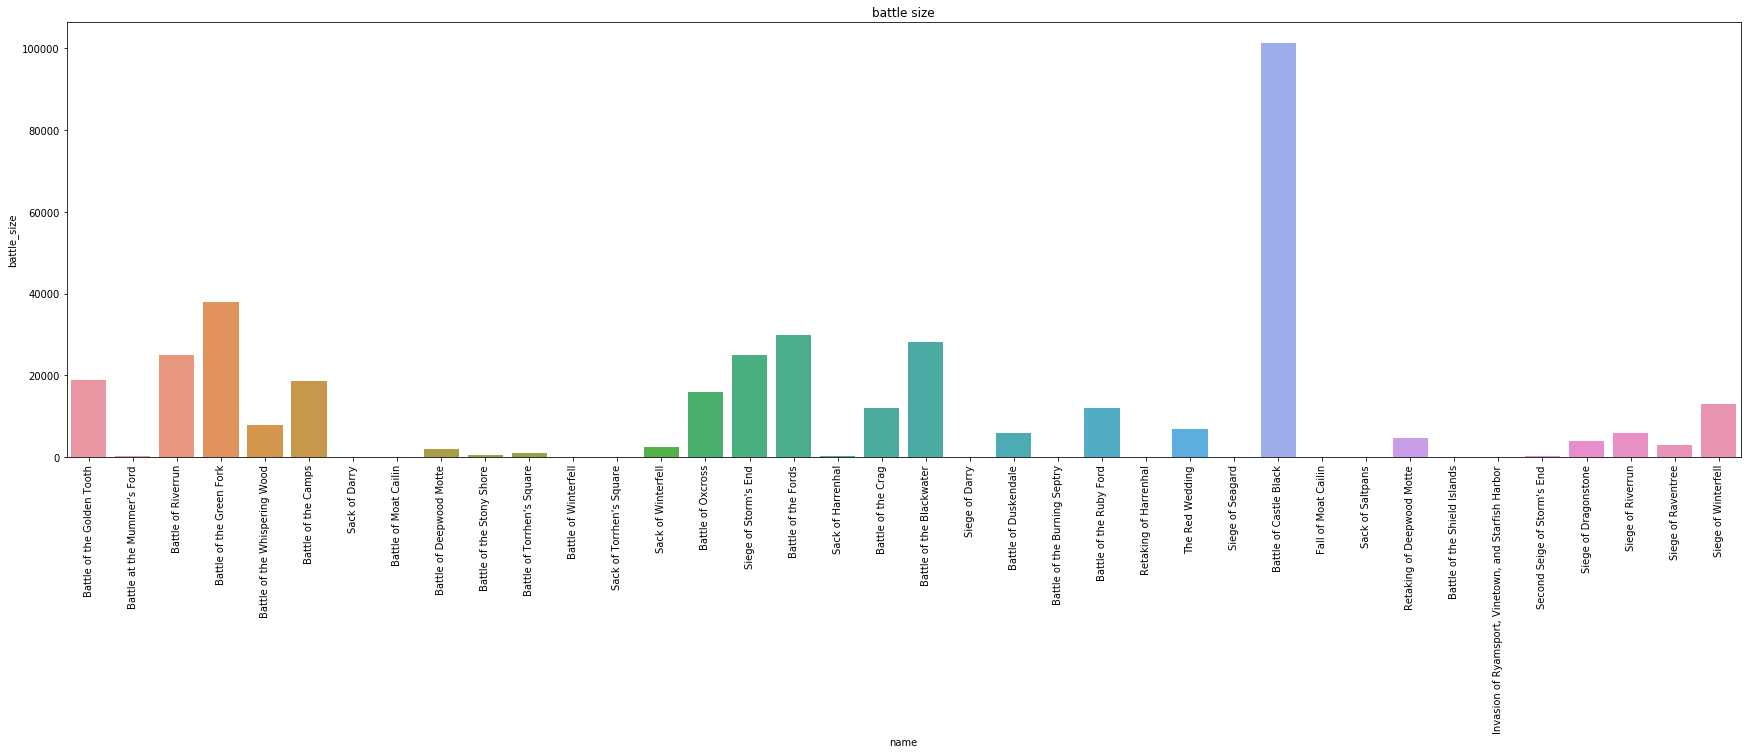

In [9]:
# 3 battle size-----------------
fig, axis1 = plt.subplots(1,1,figsize=(30,8))
axis1.set_title("battle size")
sns.barplot(x='name', y='battle_size', data=data, ax=axis1)
plt.xticks(rotation=90)
plt.show()

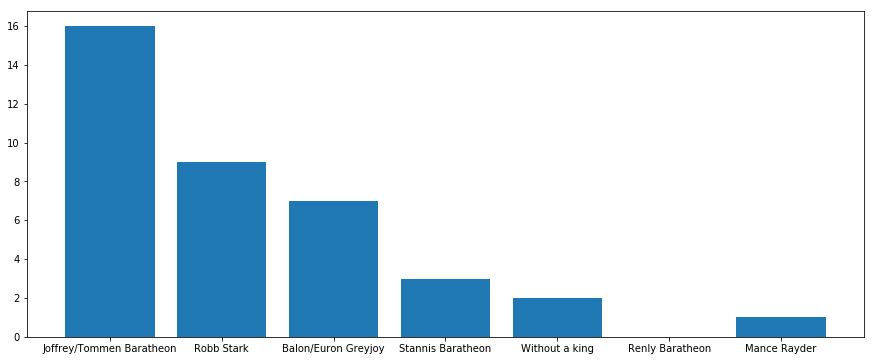

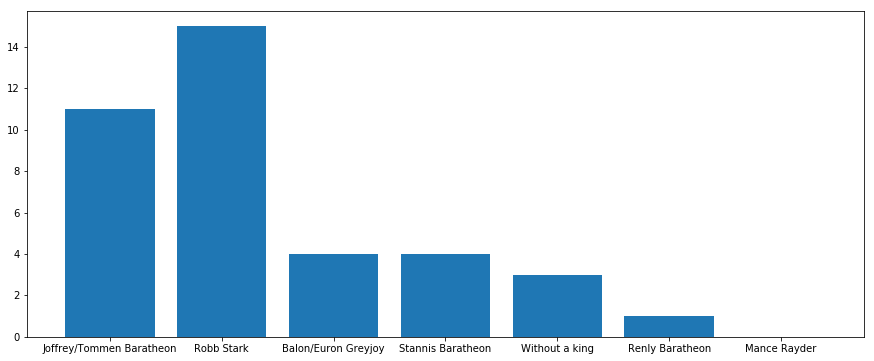

In [10]:
# 4 win&defeat board------------

kingd = data['defender_king']
kinga = data['attacker_king']
king = kinga.append(kingd)
king = king.drop_duplicates()

l = [0]
l = l * len(king)
w = dict(zip(king,l))
d = dict(zip(king,l))

for i in range(0,len(data)):
    if  data.iloc[i,13]=='win':
        w[data.iloc[i,3]]+=1
        d[data.iloc[i,4]]+=1
    else:
        w[data.iloc[i,4]]+=1
        d[data.iloc[i,3]]+=1
        
plt.figure(figsize=[15,6])
plt.bar(range(len(w)), list(w.values()), align='center')
plt.xticks(range(len(w)), list(w.keys()))
plt.show()
plt.figure(figsize=[15,6])
plt.bar(range(len(d)), list(d.values()), align='center')
plt.xticks(range(len(d)), list(d.keys()))
plt.show()

0 {'Joffrey/Tommen Baratheon': 15000.0, 'Robb Stark': 4000.0, 'Balon/Euron Greyjoy': 0, 'Stannis Baratheon': 0, 'Without a king': 0, 'Renly Baratheon': 0, 'Mance Rayder': 0}
1 {'Joffrey/Tommen Baratheon': 15120.0, 'Robb Stark': 4120.0, 'Balon/Euron Greyjoy': 0, 'Stannis Baratheon': 0, 'Without a king': 0, 'Renly Baratheon': 0, 'Mance Rayder': 0}
2 {'Joffrey/Tommen Baratheon': 30120.0, 'Robb Stark': 14120.0, 'Balon/Euron Greyjoy': 0, 'Stannis Baratheon': 0, 'Without a king': 0, 'Renly Baratheon': 0, 'Mance Rayder': 0}
3 {'Joffrey/Tommen Baratheon': 50120.0, 'Robb Stark': 32120.0, 'Balon/Euron Greyjoy': 0, 'Stannis Baratheon': 0, 'Without a king': 0, 'Renly Baratheon': 0, 'Mance Rayder': 0}
4 {'Joffrey/Tommen Baratheon': 56120.0, 'Robb Stark': 33995.0, 'Balon/Euron Greyjoy': 0, 'Stannis Baratheon': 0, 'Without a king': 0, 'Renly Baratheon': 0, 'Mance Rayder': 0}
5 {'Joffrey/Tommen Baratheon': 68745.0, 'Robb Stark': 39995.0, 'Balon/Euron Greyjoy': 0, 'Stannis Baratheon': 0, 'Without a kin

([<matplotlib.axis.XTick at 0x1a1a7b0438>,
 <a list of 7 Text xticklabel objects>)

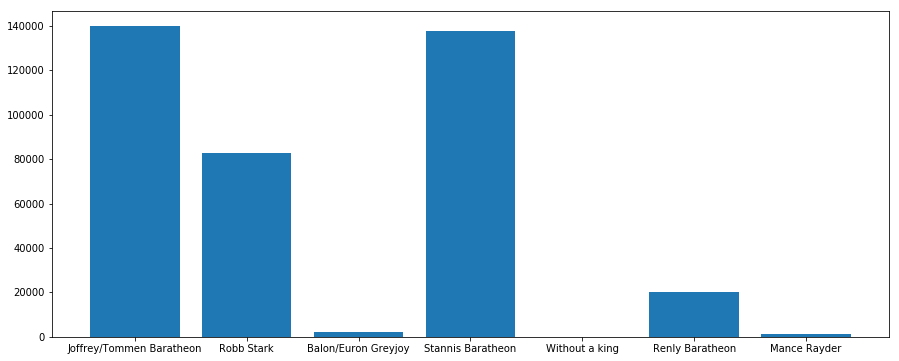

In [11]:
# 5 army size that house put

house = dict(zip(king,l))

for i in range(0,len(data)):
    if data.iloc[i,17] // 1 == data.iloc[i,17]:
        house[data.iloc[i,3]] += data.iloc[i,17]
    if data.iloc[i,18] // 1 == data.iloc[i,18]:
        house[data.iloc[i,4]] += data.iloc[i,18]
    print(i,house)

plt.figure(figsize=[15,6])
plt.bar(range(len(house)), list(house.values()), align='center')
plt.xticks(range(len(house)), list(house.keys()))


That's all process of Battle Analysis.


Thanks if you read all the way through,leave a message if you have any question